In [2]:
import numpy as np
import pandas as pd
import nilearn.image
import nilearn.plotting
import scipy.io
import scipy.optimize
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/eyshin/.pyenv/versions/eyspy3.6/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWar

In [3]:
subj_list = [
    'GA01', 'GA02', 'GA05', 'GA07', 'GA08', 'GA11', 'GA12', 'GA13', 'GA14', 'GA15',
    'GA18', 'GA19', 'GA20', 'GA21', 'GA23', 'GA26', 'GA27', 'GA28', 'GA29', 'GA30',
    'GA31', 'GA32', 'GA33', 'GA34', 'GA35', 'GA36', 'GA37', 'GA38', 'GA42', 'GA44',
    'GB01', 'GB02', 'GB05', 'GB07', 'GB08', 'GB11', 'GB12', 'GB13', 'GB14', 'GB15',
    'GB18', 'GB19', 'GB20', 'GB21', 'GB23', 'GB26', 'GB27', 'GB28', 'GB29', 'GB30',
    'GB31', 'GB32', 'GB33', 'GB34', 'GB35', 'GB36', 'GB37', 'GB38', 'GB42', 'GB44'
]

# 기존 방법처럼 14 sensor displacement 값 평균낸것

In [82]:
regress_dir='/Volumes/clmnlab/GA/regressors/reg_onset_displacement/disp_14sensors_1sec/'
#GA/AM1.disp.orthonormal.GA38.r04.1D

In [83]:
behavior_data = {}

for subj in subj_list:
    for run in [1, 2, 3]:
        matrix = []
        for sensor in range(1, 15):
            with open(regress_dir + '%s/%s_disp_1sec_r0%d_s%02d.txt' % (subj[:2], subj, run, sensor)) as file:
                for line in file:
                    matrix.append([float(a) for a in line.strip().split()])

                if len(matrix[-1]) != 97*5:
                    raise ValueError('%s %d %d' % (subj, run, sensor))
        
        behavior_data[subj, run] = np.mean(np.array(matrix), axis=0)

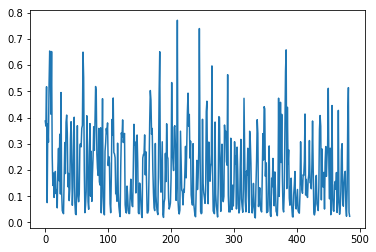

In [84]:
plt.plot(behavior_data['GA01', 1])

In [85]:
reward_data = {}

for subj in subj_list:
    for run in (1, 2, 3):
        with open('/Volumes/clmnlab/GA/behavior_data/%s/%s.r0%drew1000.GAM.1D' % (subj, subj, run)) as file:
            line = file.read()
            line = line.strip().split(' ')
            line = [float(w.split('*')[1]) for w in line]
            
        reward_data[subj, run] = line

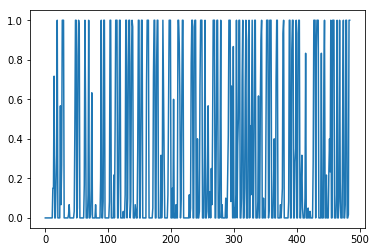

In [86]:
plt.plot(reward_data['GA01', 1])

In [87]:
np.mean(reward_data['GA01', 1]), np.mean(reward_data['GB01', 1])

(0.31069896907216493, 0.7601072164948455)

In [88]:
result = {}

for subj in subj_list:
    behavs = []
    rewards = []
    res = []
    
    for run in [1, 2, 3]:
        res.append(np.corrcoef(behavior_data[subj, run], reward_data[subj, run])[0, 1])
    
    result[subj] = np.mean(res)

In [90]:
result[subj]

-0.6168557369111793

In [91]:
min_res = 1.0
max_res = -1.0

res_temp = []

for subj in subj_list[:30]:
    res = np.mean([result[subj], result[subj.replace('A', 'B')]])
    print(subj, '\t', res)
    
    min_res = min(res, min_res)
    max_res = max(res, max_res)
    
    res_temp.append(res)
    
print('range: %.2f ~ %.2f, mean: %.2f, sem: %.2f' % (min_res, max_res, np.mean(res_temp), scipy.stats.sem(res_temp)))

GA01 	 -0.7484421768627576
GA02 	 -0.7893619673515238
GA05 	 -0.7823929217023395
GA07 	 -0.6668140326183623
GA08 	 -0.7654363652521039
GA11 	 -0.642111852492814
GA12 	 -0.6751803423109042
GA13 	 -0.7109335665449428
GA14 	 -0.6864807602631386
GA15 	 -0.7130517064346898
GA18 	 -0.6968843052994997
GA19 	 -0.6567127962656454
GA20 	 -0.7126662302671821
GA21 	 -0.6334066161348564
GA23 	 -0.6916472057852554
GA26 	 -0.6906142862586204
GA27 	 -0.7788566845842992
GA28 	 -0.7182872191028886
GA29 	 -0.6239120455510402
GA30 	 -0.7775121384474608
GA31 	 -0.6982671336655047
GA32 	 -0.6289397657719845
GA33 	 -0.603229220308326
GA34 	 -0.7338565785611183
GA35 	 -0.7171106282575939
GA36 	 -0.7590062038184012
GA37 	 -0.5900802565544329
GA38 	 -0.6333317819680447
GA42 	 -0.7086354020076849
GA44 	 -0.716676350796583
range: -0.79 ~ -0.59, mean: -0.70, sem: 0.01


In [36]:
behavs = []
rewards = []

for subj in subj_list[:30]:
    for run in [1, 2, 3]:
        behavs.extend(behavior_data[subj, run])
        rewards.extend(reward_data[subj, run])
        
    subj_ = subj.replace('A', 'B')
        
    for run in [1, 2, 3]:
        behavs.extend(behavior_data[subj_, run])
        rewards.extend(reward_data[subj_, run])
    
print(np.corrcoef(behavs, rewards)[0, 1])

-0.6197729120788392
